# EDA. Alternative Energies.
## Argentina 2018-2021
Source: https://www.economia.gob.ar/catalogo-sspmi/nuevo_dataset/energias-alternativas.csv

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import io
import numpy as np
from scipy import stats

### Load the data

In [16]:
source = '/content/energias-alternativas.csv'

with open(source, 'r', encoding='ISO-8859-1') as file:
     content = file.read()

clear_content = content.replace('"', '')

virtual_file = io.StringIO(clear_content)

df = pd.read_csv(virtual_file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7827 entries, 0 to 7826
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sector_id                  7827 non-null   int64  
 1   sector_nombre              7827 non-null   object 
 2   variable_id                7827 non-null   int64  
 3   actividad_producto_nombre  7827 non-null   object 
 4   indicador                  7827 non-null   object 
 5   unidad_de_medida           7827 non-null   object 
 6   fuente                     7827 non-null   object 
 7   frecuencia_nombre          7827 non-null   object 
 8   cobertura_nombre           7827 non-null   object 
 9   alcance_tipo               7827 non-null   object 
 10  alcance_id                 7827 non-null   int64  
 11  alcance_nombre             7827 non-null   object 
 12  indice_tiempo              7827 non-null   object 
 13  valor                      7827 non-null   float

In [17]:
# First rows
print(df.head())

   sector_id          sector_nombre  variable_id actividad_producto_nombre  \
0         25  Energías alternativas          438            Energía biogás   
1         25  Energías alternativas          438            Energía biogás   
2         25  Energías alternativas          438            Energía biogás   
3         25  Energías alternativas          438            Energía biogás   
4         25  Energías alternativas          438            Energía biogás   

    indicador unidad_de_medida   fuente frecuencia_nombre cobertura_nombre  \
0  Generación              MWh  CAMMESA           Mensual         Nacional   
1  Generación              MWh  CAMMESA           Mensual         Nacional   
2  Generación              MWh  CAMMESA           Mensual         Nacional   
3  Generación              MWh  CAMMESA           Mensual         Nacional   
4  Generación              MWh  CAMMESA           Mensual         Nacional   

  alcance_tipo  alcance_id alcance_nombre indice_tiempo    val

In [18]:
# column_names
print(df.columns.tolist())

['sector_id', 'sector_nombre', 'variable_id', 'actividad_producto_nombre', 'indicador', 'unidad_de_medida', 'fuente', 'frecuencia_nombre', 'cobertura_nombre', 'alcance_tipo', 'alcance_id', 'alcance_nombre', 'indice_tiempo', 'valor']


In [19]:
# Convert'indice_tiempo' a datetime
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7827 entries, 0 to 7826
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sector_id                  7827 non-null   int64         
 1   sector_nombre              7827 non-null   object        
 2   variable_id                7827 non-null   int64         
 3   actividad_producto_nombre  7827 non-null   object        
 4   indicador                  7827 non-null   object        
 5   unidad_de_medida           7827 non-null   object        
 6   fuente                     7827 non-null   object        
 7   frecuencia_nombre          7827 non-null   object        
 8   cobertura_nombre           7827 non-null   object        
 9   alcance_tipo               7827 non-null   object        
 10  alcance_id                 7827 non-null   int64         
 11  alcance_nombre             7827 non-null   object        
 12  indice

## Descriptive statistics.

In [21]:
df.describe()

,sector_id,variable_id,alcance_id,indice_tiempo,valor
count,7827.0,7827.000000,7827.000000,7827,7827.000000
mean,25.0,463.463396,47.393637,2019-06-02 12:05:58.758144768,28720.757138
min,25.0,438.000000,6.000000,2009-01-01 00:00:00,0.000000
25%,25.0,441.000000,14.000000,2017-03-01 00:00:00,37.600000
50%,25.0,445.000000,50.000000,2020-07-01 00:00:00,1757.950000
75%,25.0,446.000000,70.000000,2022-07-01 00:00:00,12509.905500
max,25.0,1058.000000,90.000000,2024-06-01 00:00:00,752501.256000
std,0.0,109.812252,28.396913,NaN,91253.529716


## Null Values

In [22]:
print(df.isnull().sum())

sector_id                    0
sector_nombre                0
variable_id                  0
actividad_producto_nombre    0
indicador                    0
unidad_de_medida             0
fuente                       0
frecuencia_nombre            0
cobertura_nombre             0
alcance_tipo                 0
alcance_id                   0
alcance_nombre               0
indice_tiempo                0
valor                        0
dtype: int64


## First plots

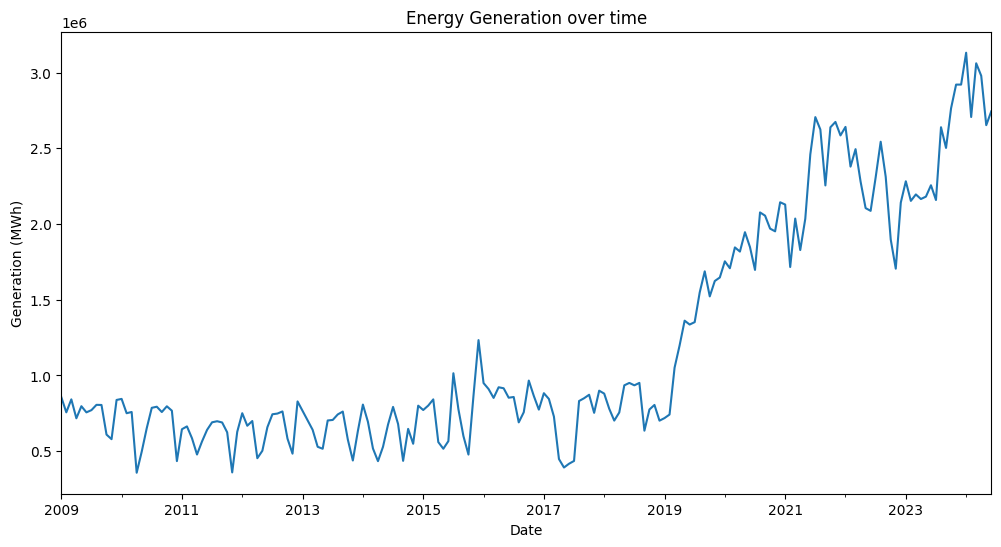

In [23]:
# Line graph for power generation over time
plt.figure(figsize=(12, 6))
df.groupby('indice_tiempo')['valor'].sum().plot(kind='line')
plt.title('Energy Generation over time')
plt.xlabel('Date')
plt.ylabel('Generation (MWh)')
plt.show()

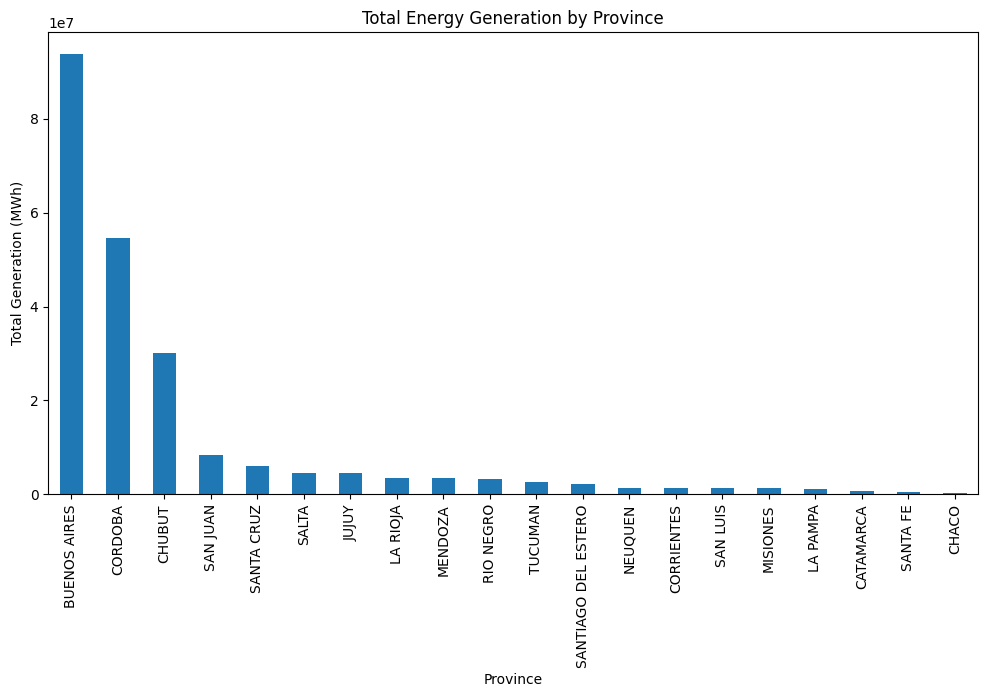

In [24]:
# Bar chart for generation by province
plt.figure(figsize=(12, 6))
df.groupby('alcance_nombre')['valor'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Energy Generation by Province')
plt.xlabel('Province')
plt.ylabel('Total Generation (MWh)')
plt.xticks(rotation=90)
plt.show()

## Feature engineering

In [25]:
# Temporal feature extraction
df['año'] = df['indice_tiempo'].dt.year
df['mes'] = df['indice_tiempo'].dt.month
df['dia_semana'] = df['indice_tiempo'].dt.dayofweek
df['trimestre'] = df['indice_tiempo'].dt.quarter

In [26]:
# Creating added features
df['valor_acumulado'] = df.groupby('alcance_id')['valor'].cumsum()
df['valor_promedio_anual'] = df.groupby(['alcance_id', 'año'])['valor'].transform('mean')

In [27]:
# Interaction features
df['valor_por_mes'] = df['valor'] / df['mes']

In [28]:
# Binning the variable 'value'
df['valor_categoria'] = pd.qcut(df['valor'], q=5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])

In [29]:
print(df.columns)
print(df.head())

Index(['sector_id', 'sector_nombre', 'variable_id',
       'actividad_producto_nombre', 'indicador', 'unidad_de_medida', 'fuente',
       'frecuencia_nombre', 'cobertura_nombre', 'alcance_tipo', 'alcance_id',
       'alcance_nombre', 'indice_tiempo', 'valor', 'año', 'mes', 'dia_semana',
       'trimestre', 'valor_acumulado', 'valor_promedio_anual', 'valor_por_mes',
       'valor_categoria'],
      dtype='object')
   sector_id          sector_nombre  variable_id actividad_producto_nombre  \
0         25  Energías alternativas          438            Energía biogás   
1         25  Energías alternativas          438            Energía biogás   
2         25  Energías alternativas          438            Energía biogás   
3         25  Energías alternativas          438            Energía biogás   
4         25  Energías alternativas          438            Energía biogás   

    indicador unidad_de_medida   fuente frecuencia_nombre cobertura_nombre  \
0  Generación              MWh  CAMM

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7827 entries, 0 to 7826
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sector_id                  7827 non-null   int64         
 1   sector_nombre              7827 non-null   object        
 2   variable_id                7827 non-null   int64         
 3   actividad_producto_nombre  7827 non-null   object        
 4   indicador                  7827 non-null   object        
 5   unidad_de_medida           7827 non-null   object        
 6   fuente                     7827 non-null   object        
 7   frecuencia_nombre          7827 non-null   object        
 8   cobertura_nombre           7827 non-null   object        
 9   alcance_tipo               7827 non-null   object        
 10  alcance_id                 7827 non-null   int64         
 11  alcance_nombre             7827 non-null   object        
 12  indice

## Saving the new dataset

In [31]:
df.to_csv('new_dataset.csv', index=False)

# Project questions:

* A) What is the trend regarding the amount of energy generated per year in this dataset?
* B) On average, which is the month of the year in which the most energy is produced?
* C) Which provinces have improved their energy production in the last year, compared to the first?

## A) What is the trend regarding the amount of energy generated per year in this dataset?

indice_tiempo
2009    9.131696e+06
2010    8.193512e+06
2011    7.263168e+06
2012    7.877822e+06
2013    7.711002e+06
2014    7.559129e+06
2015    9.022191e+06
2016    1.030914e+07
2017    8.351031e+06
2018    9.803240e+06
2019    1.578516e+07
2020    2.280933e+07
2021    2.768266e+07
2022    2.689075e+07
2023    2.913453e+07
2024    1.727300e+07
Name: valor, dtype: float64


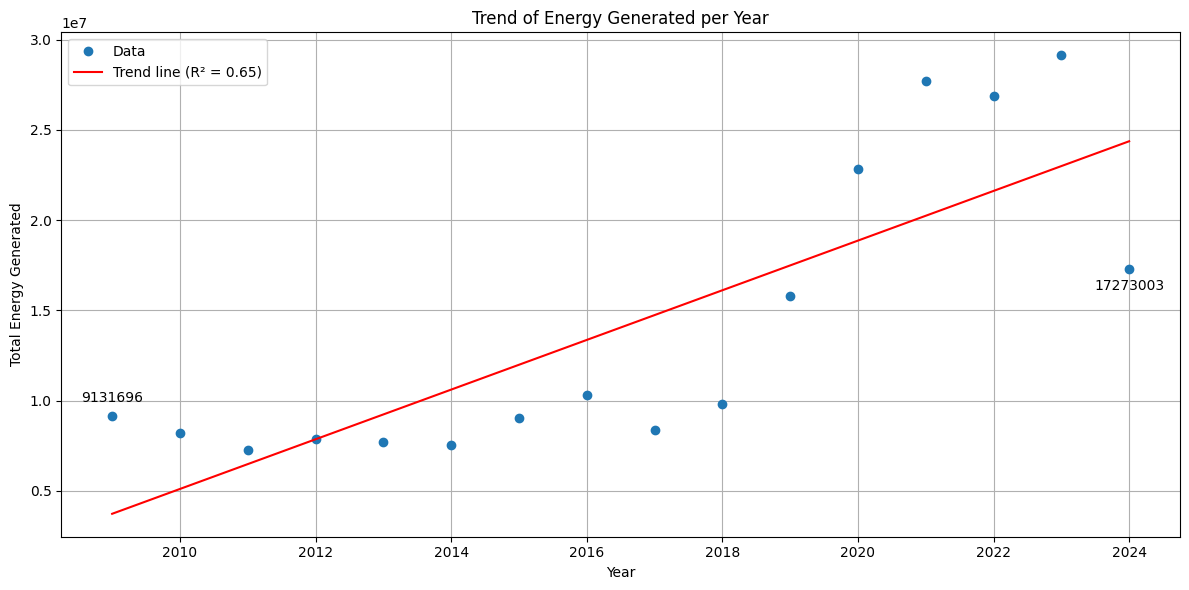


The trend line shows an average yearly increase of 1376034.16 units of energy.
R-squared value: 0.65


In [32]:
# Load the dataset
df = pd.read_csv('new_dataset.csv')

# Convert 'indice_tiempo' to datetime if it's not already
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])

energy_per_year = df.groupby(df['indice_tiempo'].dt.year)['valor'].sum()
print(energy_per_year)

# Prepare data for trend line
x = np.array(energy_per_year.index)
y = energy_per_year.values

# Calculate the trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, line, 'r', label=f'Trend line (R² = {r_value**2:.2f})')
plt.title('Trend of Energy Generated per Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Generated')
plt.legend()
plt.grid(True)

# Add annotations for the first and last year
plt.annotate(f'{y[0]:.0f}', (x[0], y[0]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'{y[-1]:.0f}', (x[-1], y[-1]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()

# Print the slope of the trend line
print(f"\nThe trend line shows an average yearly increase of {slope:.2f} units of energy.")
print(f"R-squared value: {r_value**2:.2f}")

# B) Month of the year with highest average energy production

The month with the highest average energy production is: 12


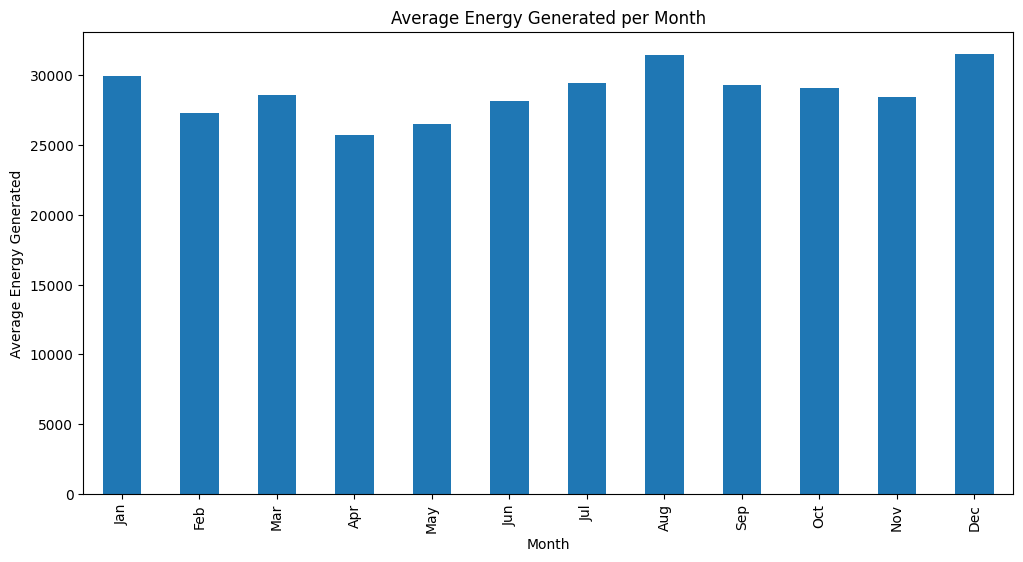

In [33]:
energy_per_month = df.groupby(df['indice_tiempo'].dt.month)['valor'].mean()
max_energy_month = energy_per_month.idxmax()
print(f"The month with the highest average energy production is: {max_energy_month}")

plt.figure(figsize=(12, 6))
energy_per_month.plot(kind='bar')
plt.title('Average Energy Generated per Month')
plt.xlabel('Month')
plt.ylabel('Average Energy Generated')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# C) Provinces that have improved their production in the last year compared to the first

First Year: 2009
Last Year: 2024

NaN values in the results:
Production First Year    9
Production Last Year     0
Production Difference    9
dtype: int64

Detailed results:
                     Production First Year  Production Last Year  \
alcance_nombre                                                     
BUENOS AIRES                       2396515               7035570   
CATAMARCA                                0                 74523   
CHACO                                    0                 36757   
CHUBUT                              148948               2903390   
CORDOBA                            5463401               3019530   
CORRIENTES                               0                163636   
JUJUY                               109903                436184   
LA PAMPA                                 0                109621   
LA RIOJA                                 0                443015   
MENDOZA                             263740                164728   
MISIONES  

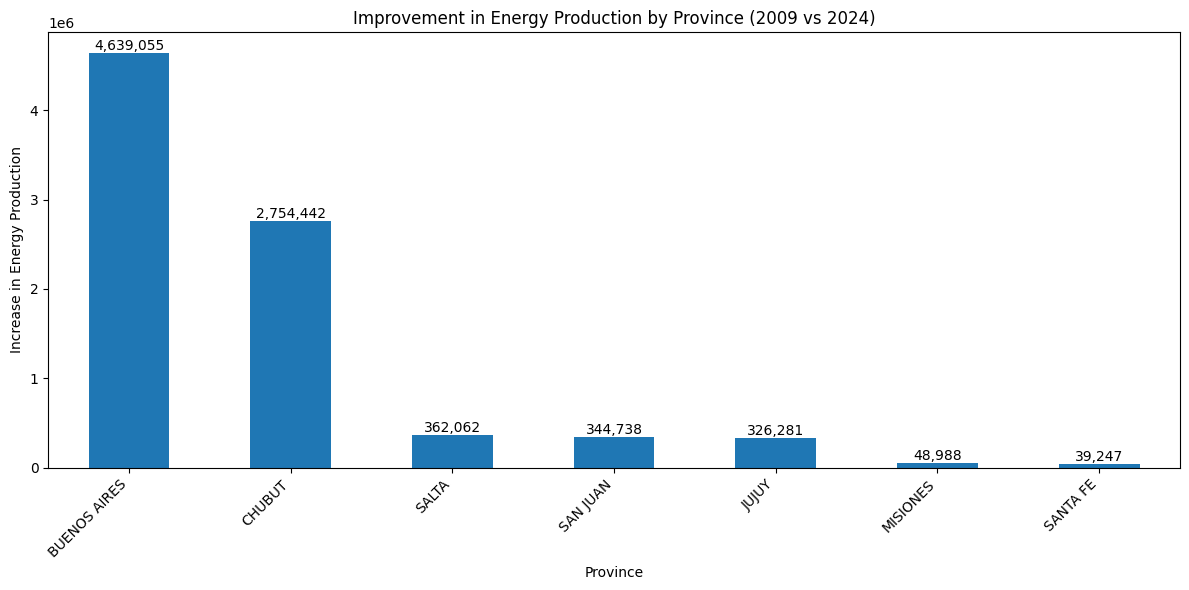

In [34]:
# Ensure 'valor' is numeric
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# Calculate the first and last year
first_year = df['indice_tiempo'].dt.year.min()
last_year = df['indice_tiempo'].dt.year.max()

print(f"First Year: {first_year}")
print(f"Last Year: {last_year}")

# Function to calculate production by province for a specific year
def production_by_year(year):
    return df[df['indice_tiempo'].dt.year == year].groupby('alcance_nombre')['valor'].sum()

# Calculate production for the first and last year
production_first_year = production_by_year(first_year)
production_last_year = production_by_year(last_year)

# Calculate the production difference
production_difference = production_last_year - production_first_year

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Production First Year': production_first_year,
    'Production Last Year': production_last_year,
    'Production Difference': production_difference
})

# Handle NaN or infinite values
results_df = results_df.replace([np.inf, -np.inf], np.nan)

# Print information about NaN values
print("\nNaN values in the results:")
print(results_df.isna().sum())

# Round values to integers, replacing NaN with 0
results_df = results_df.fillna(0).round(0).astype(int)

# Add 'Has Improved' column
results_df['Has Improved'] = results_df['Production Difference'] > 0

# Filter only provinces that have improved and sort by magnitude of improvement
improved_provinces = results_df[results_df['Has Improved']].sort_values('Production Difference', ascending=False)

# Print detailed results
print("\nDetailed results:")
print(results_df)

print("\nProvinces that have improved their production:")
print(improved_provinces[['Production Difference']])

# Visualization
plt.figure(figsize=(12, 6))
improved_provinces['Production Difference'].plot(kind='bar')
plt.title(f'Improvement in Energy Production by Province ({first_year} vs {last_year})')
plt.xlabel('Province')
plt.ylabel('Increase in Energy Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on the bars
for i, v in enumerate(improved_provinces['Production Difference']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.show()